In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Importing the Dataset
# Source: https://archive.ics.uci.edu/ml/datasets/online+news+popularity
data = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [15]:
headers = data.columns
headers

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [16]:
# Categorizing data into numerical and categorical data
num_data = headers[1:]
cat_data = ["url"]

In [17]:
# Frequency Distribution of Categorical Data

for attribute in cat_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
    
    print("Attribute:", attribute)
    for val in data[attribute].unique():
        print(val + ":", freq_dist[val])
    print()
    print("-----------------------------")
    print()

Attribute: url
http://mashable.com/2013/01/07/amazon-instant-video-browser/: 1
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/: 1
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/: 1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/: 1
http://mashable.com/2013/01/07/att-u-verse-apps/: 1
http://mashable.com/2013/01/07/beewi-smart-toys/: 1
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/: 1
http://mashable.com/2013/01/07/canon-poweshot-n/: 1
http://mashable.com/2013/01/07/car-of-the-future-infographic/: 1
http://mashable.com/2013/01/07/chuck-hagel-website/: 1
http://mashable.com/2013/01/07/cosmic-events-doomsday/: 1
http://mashable.com/2013/01/07/crayon-creatures/: 1
http://mashable.com/2013/01/07/creature-cups/: 1
http://mashable.com/2013/01/07/dad-jokes/: 1
http://mashable.com/2013/01/07/downton-abbey-tumblrs/: 1
http://mashable.com/2013/01/07/earth-size-planets-milky-way/: 1
http://mashable.com/2013/01/07/echo-game/: 1
http://mashable.com/20

http://mashable.com/2013/01/22/beyonce-lip-sync-national-anthem-inauguration/: 1
http://mashable.com/2013/01/22/bigoven-app/: 1
http://mashable.com/2013/01/22/bill-gates-gods-work/: 1
http://mashable.com/2013/01/22/biological-passport-sports-doping/: 1
http://mashable.com/2013/01/22/bioshock-infinite-creators-writing-ebook-prequel-to-the-game/: 1
http://mashable.com/2013/01/22/booking-com-35-million-ad-campaign/: 1
http://mashable.com/2013/01/22/can-humans-live-on-mars/: 1
http://mashable.com/2013/01/22/coca-cola-super-bowl/: 1
http://mashable.com/2013/01/22/cracked-iphone-importance-screen-protectors/: 1
http://mashable.com/2013/01/22/email-auto-filtering-marketing/: 1
http://mashable.com/2013/01/22/facebook-envy/: 1
http://mashable.com/2013/01/22/fbi-white-collar-crimes-getglue/: 1
http://mashable.com/2013/01/22/firefox-os-developer-preview-phone/: 1
http://mashable.com/2013/01/22/first-photos-black-holes/: 1
http://mashable.com/2013/01/22/flu-advice-online-reliable/: 1
http://mashab

http://mashable.com/2013/02/04/super-bowl-halftime-songs/: 1
http://mashable.com/2013/02/04/super-bowl-on-facebook/: 1
http://mashable.com/2013/02/04/super-bowl-social-media/: 1
http://mashable.com/2013/02/04/super-bowl-twitter-numbers/: 1
http://mashable.com/2013/02/04/super-bowl-twitter/: 1
http://mashable.com/2013/02/04/syria-skype/: 1
http://mashable.com/2013/02/04/tomb-raider-first-impressions/: 1
http://mashable.com/2013/02/04/twitter-made-super-bowl-awesome/: 1
http://mashable.com/2013/02/04/twitter-super-bowl-mentions/: 1
http://mashable.com/2013/02/04/unicorn-accessories/: 1
http://mashable.com/2013/02/04/urban-snowboarders/: 1
http://mashable.com/2013/02/04/valentine-tees/: 1
http://mashable.com/2013/02/04/walking-dead-80s-sitcom/: 1
http://mashable.com/2013/02/04/when-will-we-get-google-fiber/: 1
http://mashable.com/2013/02/04/why-startups-fail/: 1
http://mashable.com/2013/02/04/will-ferrell-old-milwaukee-super-bowl-ad/: 1
http://mashable.com/2013/02/04/women-in-science-info

http://mashable.com/2013/02/14/proposal-rejection-prank/: 1
http://mashable.com/2013/02/14/raspberry-pi-anatomy/: 1
http://mashable.com/2013/02/14/research-needed-effect-violent-media-children/: 1
http://mashable.com/2013/02/14/romantic-states-social-media/: 1
http://mashable.com/2013/02/14/roses-are-red-comedians/: 1
http://mashable.com/2013/02/14/samsung-refrigerator-soda-stream/: 1
http://mashable.com/2013/02/14/single-cats-valentines-day/: 1
http://mashable.com/2013/02/14/startup-act/: 1
http://mashable.com/2013/02/14/stephen-fry-twitter-proposal/: 1
http://mashable.com/2013/02/14/student-wins-tuition-buzzer-beater/: 1
http://mashable.com/2013/02/14/subway-style-blogger-event/: 1
http://mashable.com/2013/02/14/survey-americans-worried-about-cybersecurity/: 1
http://mashable.com/2013/02/14/tamagotchi-app/: 1
http://mashable.com/2013/02/14/technology-dating/: 1
http://mashable.com/2013/02/14/tesla-vs-nyt/: 1
http://mashable.com/2013/02/14/the-internship-google/: 1
http://mashable.com

http://mashable.com/2013/02/28/kaley-cuoco-dish-tweet/: 1
http://mashable.com/2013/02/28/klout-vip-perks/: 1
http://mashable.com/2013/02/28/leap-wireless-unsold-iphones/: 1
http://mashable.com/2013/02/28/lebron-james-miami-heat-harlem-shake/: 1
http://mashable.com/2013/02/28/live-chat-grasshopper/: 1
http://mashable.com/2013/02/28/maddie-on-things/: 1
http://mashable.com/2013/02/28/myspace-tom-twitter/: 1
http://mashable.com/2013/02/28/naked-famous-jeans-body-temperature/: 1
http://mashable.com/2013/02/28/nasa-details-russian-meteor/: 1
http://mashable.com/2013/02/28/nbc-deception/: 1
http://mashable.com/2013/02/28/new-adidas-basketball-uniforms/: 1
http://mashable.com/2013/02/28/onesie-song/: 1
http://mashable.com/2013/02/28/online-gaming-atlantic-city-casino/: 1
http://mashable.com/2013/02/28/opentables-new-facebook-app-shows-where-your-friends-have-dined-out/: 1
http://mashable.com/2013/02/28/oscars-orchestra-jaws-song-audio/: 1
http://mashable.com/2013/02/28/ouya-ship-date/: 1
http

http://mashable.com/2013/03/14/mashable-online-career-expo-april/: 1
http://mashable.com/2013/03/14/matthew-keys-anonymous/: 1
http://mashable.com/2013/03/14/menswear-dog-own/: 1
http://mashable.com/2013/03/14/michael-santos-prison-online/: 1
http://mashable.com/2013/03/14/modem/: 1
http://mashable.com/2013/03/14/nba-player-reaction-ejected/: 1
http://mashable.com/2013/03/14/new-york-times-article-redesign-hands-on/: 1
http://mashable.com/2013/03/14/nintendo-patent-violation/: 1
http://mashable.com/2013/03/14/nyc-timelapse/: 1
http://mashable.com/2013/03/14/phil-schiller-slams-android/: 1
http://mashable.com/2013/03/14/pi-day-videos/: 1
http://mashable.com/2013/03/14/pie-facts/: 1
http://mashable.com/2013/03/14/pope-francis-fonts/: 1
http://mashable.com/2013/03/14/samsung-galaxy-s-4-instant-translator/: 1
http://mashable.com/2013/03/14/samsung-galaxy-s-4-live-blog/: 1
http://mashable.com/2013/03/14/samsung-galaxy-s-4-release-date/: 1
http://mashable.com/2013/03/14/samsung-galaxy-s-4s-c

http://mashable.com/2013/03/28/a-test-drive-sexy-renault/: 1
http://mashable.com/2013/03/28/a-violin-made-of-lasers/: 1
http://mashable.com/2013/03/28/activision-uncanny/: 1
http://mashable.com/2013/03/28/amazon-buys-goodreads/: 1
http://mashable.com/2013/03/28/apple-patents-smart-pen/: 1
http://mashable.com/2013/03/28/apples-smart-pen-patent/: 1
http://mashable.com/2013/03/28/attack-spamhaus-brief/: 1
http://mashable.com/2013/03/28/bacon-scope-mouthwash/: 1
http://mashable.com/2013/03/28/bacteria-art-photos/: 1
http://mashable.com/2013/03/28/best-buy-employee-saves-robot/: 1
http://mashable.com/2013/03/28/bioshock-audio-diary/: 1
http://mashable.com/2013/03/28/biting-elbows-vodka-ad/: 1
http://mashable.com/2013/03/28/blackberry-1-million/: 1
http://mashable.com/2013/03/28/buick-pinterest-car-concept/: 1
http://mashable.com/2013/03/28/computer-from-living-cell/: 1
http://mashable.com/2013/03/28/cyber-aces/: 1
http://mashable.com/2013/03/28/ddos-attacks-not-the-only-way-to-disrupt-inter

http://mashable.com/2013/04/12/ray-bradbury-ebooks-kindle-nook/: 1
http://mashable.com/2013/04/12/responsive-design-tips/: 1
http://mashable.com/2013/04/12/romantic-comedy-formula/: 1
http://mashable.com/2013/04/12/runaway-golf-cart-lawsuit/: 1
http://mashable.com/2013/04/12/samsung-galaxy-s-4-teardown/: 1
http://mashable.com/2013/04/12/social-media-demographic-breakdown/: 1
http://mashable.com/2013/04/12/spy-tech-satellites-bumping/: 1
http://mashable.com/2013/04/12/stolen-laptop-iran-apology/: 1
http://mashable.com/2013/04/12/street-view-hyperlapse/: 1
http://mashable.com/2013/04/12/terrible-love-life-comics/: 1
http://mashable.com/2013/04/12/they-might-be-giants-nanobots-video/: 1
http://mashable.com/2013/04/12/twitter-job-atwitter/: 1
http://mashable.com/2013/04/12/twitter-music-site-launch/: 1
http://mashable.com/2013/04/12/vine-ad-attacks-colbert-busch/: 1
http://mashable.com/2013/04/12/weird-cat-gifs/: 1
http://mashable.com/2013/04/12/windows-8-pc-sales-woes/: 1
http://mashable.

http://mashable.com/2013/04/27/io-denim-smartphone/: 1
http://mashable.com/2013/04/27/mark-zuckerberg-1-dollar-salary/: 1
http://mashable.com/2013/04/27/morephone-screen/: 1
http://mashable.com/2013/04/27/pregnancy-apps/: 1
http://mashable.com/2013/04/27/roi-definition/: 1
http://mashable.com/2013/04/27/romance-apps/: 1
http://mashable.com/2013/04/27/scary-videos/: 1
http://mashable.com/2013/04/27/top-10-tech-26/: 1
http://mashable.com/2013/04/27/top-comments-9/: 1
http://mashable.com/2013/04/27/work-tips-dream-job/: 1
http://mashable.com/2013/04/28/auctioning-ceos/: 1
http://mashable.com/2013/04/28/daniel-day-lewis-plays-obama/: 1
http://mashable.com/2013/04/28/drawsomething-2-drippler/: 1
http://mashable.com/2013/04/28/early-bird-news-comic/: 1
http://mashable.com/2013/04/28/eve-online-game-tv-series/: 1
http://mashable.com/2013/04/28/gifboom-update-adds-voice-music/: 1
http://mashable.com/2013/04/28/house-of-cards-correspondents-dinner/: 1
http://mashable.com/2013/04/28/hugh-jackman

http://mashable.com/2013/05/13/snow-white-dwarfs/: 1
http://mashable.com/2013/05/13/social-media-advice-column-5-13/: 1
http://mashable.com/2013/05/13/sony-xperia-zr/: 1
http://mashable.com/2013/05/13/space-travel-sci-fi-short/: 1
http://mashable.com/2013/05/13/spotify-tips/: 1
http://mashable.com/2013/05/13/startup-valuation/: 1
http://mashable.com/2013/05/13/stash-waterproof-pocket-shorts/: 1
http://mashable.com/2013/05/13/time-millennial-photoshop/: 1
http://mashable.com/2013/05/13/tonight-show-gas-pump-fake/: 1
http://mashable.com/2013/05/13/twitter-acquires-lucky-sort/: 1
http://mashable.com/2013/05/13/ugly-cute-animals/: 1
http://mashable.com/2013/05/13/vine-peanuts-snoopy-khoa-phan/: 1
http://mashable.com/2013/05/13/what-to-expect-blackberry-live/: 1
http://mashable.com/2013/05/13/wikipedia-edits-live-map/: 1
http://mashable.com/2013/05/13/x-flares-sun-video/: 1
http://mashable.com/2013/05/14/25-gross-words-that-everyone-hates/: 1
http://mashable.com/2013/05/14/abc-new-fall-show

http://mashable.com/2013/05/25/gmail-overhaul-rumor/: 1
http://mashable.com/2013/05/25/google-buzz-really-dead/: 1
http://mashable.com/2013/05/25/google-glass-photographer/: 1
http://mashable.com/2013/05/25/hiring-interns/: 1
http://mashable.com/2013/05/25/internet-week/: 1
http://mashable.com/2013/05/25/memorial-day-parade/: 1
http://mashable.com/2013/05/25/top-10-tech-this-week-46/: 1
http://mashable.com/2013/05/25/westboro-hacker-oklahoma/: 1
http://mashable.com/2013/05/25/wikileaks-we-steal-secrets/: 1
http://mashable.com/2013/05/25/winners-smartphone-market/: 1
http://mashable.com/2013/05/25/yahoos-design-chief-leaves-the-company/: 1
http://mashable.com/2013/05/26/3d-tour-mount-everest-app/: 1
http://mashable.com/2013/05/26/6-apps-3/: 1
http://mashable.com/2013/05/26/apple-1-auction-sale/: 1
http://mashable.com/2013/05/26/apple-iwatch/: 1
http://mashable.com/2013/05/26/apple-taxes-comic/: 1
http://mashable.com/2013/05/26/apps-hands-on-4/: 1
http://mashable.com/2013/05/26/arrested-

http://mashable.com/2013/06/11/faces-of-the-future/: 1
http://mashable.com/2013/06/11/fathers-day-tech-gifts/: 1
http://mashable.com/2013/06/11/figure-1-app/: 1
http://mashable.com/2013/06/11/google-buys-waze/: 1
http://mashable.com/2013/06/11/google-design-guidelines/: 1
http://mashable.com/2013/06/11/google-letter-nsa-surveillance/: 1
http://mashable.com/2013/06/11/google-trends-visualization/: 1
http://mashable.com/2013/06/11/gross-candy/: 1
http://mashable.com/2013/06/11/hobbit-desolation-smaug-trailer/: 1
http://mashable.com/2013/06/11/homeless-entrepreneur-thomas-backlund/: 1
http://mashable.com/2013/06/11/hot-engineering-jobs/: 1
http://mashable.com/2013/06/11/ian-stewart-twitter-suspended/: 1
http://mashable.com/2013/06/11/ios-7-apple/: 1
http://mashable.com/2013/06/11/ios-7-developers/: 1
http://mashable.com/2013/06/11/itwin-connect-2/: 1
http://mashable.com/2013/06/11/ku-boobs-twitter/: 1
http://mashable.com/2013/06/11/lebron-james-2k14/: 1
http://mashable.com/2013/06/11/left

http://mashable.com/2013/06/28/mashies-marketing-awards/: 1
http://mashable.com/2013/06/28/microsoft-do-over/: 1
http://mashable.com/2013/06/28/midnight-snack-hacks/: 1
http://mashable.com/2013/06/28/mlg-gaming-championship/: 1
http://mashable.com/2013/06/28/nasa-photographer-planets-closer-to-earth/: 1
http://mashable.com/2013/06/28/nba-draft-victor-oladipo-google-glass/: 1
http://mashable.com/2013/06/28/netflix-max-voice-ps3-voice/: 1
http://mashable.com/2013/06/28/new-yorker-cover/: 1
http://mashable.com/2013/06/28/overly-attached-girlfriend-sandwich/: 1
http://mashable.com/2013/06/28/postmodern-jukebox/: 1
http://mashable.com/2013/06/28/researcher-facebook-bug/: 1
http://mashable.com/2013/06/28/robotic-fish-robocarp/: 1
http://mashable.com/2013/06/28/saltwater-drinking-water/: 1
http://mashable.com/2013/06/28/smartphone-charger-kinetic/: 1
http://mashable.com/2013/06/28/social-media-day-hangout/: 1
http://mashable.com/2013/06/28/space-race-tv-pilot/: 1
http://mashable.com/2013/06/2

http://mashable.com/2013/07/15/real-time-marketing/: 1
http://mashable.com/2013/07/15/reddit-pizza-cancer/: 1
http://mashable.com/2013/07/15/report-apple-aggressively-hiring-for-iwatch-project/: 1
http://mashable.com/2013/07/15/report-microsoft-surface-watch-will-launch-in-2014/: 1
http://mashable.com/2013/07/15/samsung-ativ-book-9-lite/: 1
http://mashable.com/2013/07/15/samsung-chips-apple/: 1
http://mashable.com/2013/07/15/san-francisco-trayvon-martin-fake/: 1
http://mashable.com/2013/07/15/sharknado-irl/: 1
http://mashable.com/2013/07/15/sharknado-nielsen-social-tv-vh1/: 1
http://mashable.com/2013/07/15/sharknado-viral/: 1
http://mashable.com/2013/07/15/shopping-delivery/: 1
http://mashable.com/2013/07/15/smart-diapers/: 1
http://mashable.com/2013/07/15/social-good-summit-ron-garan/: 1
http://mashable.com/2013/07/15/spider-man-infographic/: 1
http://mashable.com/2013/07/15/spotify-radiohead-thom-yorke/: 1
http://mashable.com/2013/07/15/steve-jobs-instagram-trailer/: 1
http://mashabl

http://mashable.com/2013/07/31/bioshock-infinite-music/: 1
http://mashable.com/2013/07/31/bradley-cooper-and-jennifer-lawrence-reunite-in-american-hustle-trailer/: 1
http://mashable.com/2013/07/31/bret-taylor-quip/: 1
http://mashable.com/2013/07/31/c-suite-infographic/: 1
http://mashable.com/2013/07/31/china-virtual-ecommerce/: 1
http://mashable.com/2013/07/31/college-tech/: 1
http://mashable.com/2013/07/31/coravin-wine/: 1
http://mashable.com/2013/07/31/design-jobs-board/: 1
http://mashable.com/2013/07/31/eterna-trailer/: 1
http://mashable.com/2013/07/31/everlapse-top-instagram-photos-slideshow/: 1
http://mashable.com/2013/07/31/facebook-data-profit/: 1
http://mashable.com/2013/07/31/facebook-embeddable-posts/: 1
http://mashable.com/2013/07/31/facebook-on-this-day/: 1
http://mashable.com/2013/07/31/facebook-returns-ipo-price/: 1
http://mashable.com/2013/07/31/facebook-tv-ad-study-nielsen/: 1
http://mashable.com/2013/07/31/geek-street-fair/: 1
http://mashable.com/2013/07/31/google-copy

http://mashable.com/2013/08/16/hdhacks-recap/: 1
http://mashable.com/2013/08/16/information-bits-teleport/: 1
http://mashable.com/2013/08/16/ios-android-development/: 1
http://mashable.com/2013/08/16/iphone-not-working/: 1
http://mashable.com/2013/08/16/itunes-movie-sale/: 1
http://mashable.com/2013/08/16/jobs-movie-josh-gad-interview/: 1
http://mashable.com/2013/08/16/kristen-wiig-drunk-gifs/: 1
http://mashable.com/2013/08/16/marissa-mayer-vogue/: 1
http://mashable.com/2013/08/16/medieval-child-last-day/: 1
http://mashable.com/2013/08/16/michelle-phan-makeup/: 1
http://mashable.com/2013/08/16/motorola-skip/: 1
http://mashable.com/2013/08/16/motorolas-moto-maker-hands-on/: 1
http://mashable.com/2013/08/16/must-reads-8-16-13/: 1
http://mashable.com/2013/08/16/nasa-contest-mars-greenhouse/: 1
http://mashable.com/2013/08/16/new-retail-web/: 1
http://mashable.com/2013/08/16/new-snowden-leak-thousands-nsa-violations/: 1
http://mashable.com/2013/08/16/nsa-file-request/: 1
http://mashable.com

http://mashable.com/2013/09/03/nba-drummond-icarly/: 1
http://mashable.com/2013/09/03/new-amazon-paperwhite/: 1
http://mashable.com/2013/09/03/new-york-fashion-week-where-to-watch-video/: 1
http://mashable.com/2013/09/03/nokia-microsoft-partnership/: 1
http://mashable.com/2013/09/03/nokia-product-history/: 1
http://mashable.com/2013/09/03/pentagon-planned-security-before-syrians-hacked-marine-site/: 1
http://mashable.com/2013/09/03/photo-challenge-silhouette-photos/: 1
http://mashable.com/2013/09/03/rejected-android-food-names/: 1
http://mashable.com/2013/09/03/republican-support-syria/: 1
http://mashable.com/2013/09/03/scott-pham-guest-post/: 1
http://mashable.com/2013/09/03/socialflow/: 1
http://mashable.com/2013/09/03/spotify-connect/: 1
http://mashable.com/2013/09/03/this-video-of-cats-slipping-down-slides-is-aw-inducing/: 1
http://mashable.com/2013/09/03/walkie-talkie-melt-car/: 1
http://mashable.com/2013/09/03/weixin-vs-weibo/: 1
http://mashable.com/2013/09/03/work-eight-hours-a-

http://mashable.com/2013/09/19/linus-torvalds-backdoor-linux/: 1
http://mashable.com/2013/09/19/marissa-mayer-retweets-users/: 1
http://mashable.com/2013/09/19/microprocessor-wine/: 1
http://mashable.com/2013/09/19/microsoft-trade-in-program/: 1
http://mashable.com/2013/09/19/miley-cyrus-documentary-trailer/: 1
http://mashable.com/2013/09/19/my-yahoo-redesign/: 1
http://mashable.com/2013/09/19/nasa-curiosity-rover-selfies/: 1
http://mashable.com/2013/09/19/need-to-know-jobs-act/: 1
http://mashable.com/2013/09/19/pinterest-promoted-pins/: 1
http://mashable.com/2013/09/19/pirate-photo-app/: 1
http://mashable.com/2013/09/19/placesweluv-instagram/: 1
http://mashable.com/2013/09/19/ps4-companion-app/: 1
http://mashable.com/2013/09/19/realistic-grand-theft-auto/: 1
http://mashable.com/2013/09/19/samsung-galaxy-mega-review/: 1
http://mashable.com/2013/09/19/samsung-smartcam-pro/: 1
http://mashable.com/2013/09/19/seismic-social-makeover/: 1
http://mashable.com/2013/09/19/snoutbook-pets-app/: 1

http://mashable.com/2013/10/03/philips-google-glass/: 1
http://mashable.com/2013/10/03/pinterest-wedding-board-reality/: 1
http://mashable.com/2013/10/03/rdio-launches-free-music-streaming-for-ios-and-android/: 1
http://mashable.com/2013/10/03/salt-ship-design/: 1
http://mashable.com/2013/10/03/samsung-homesync/: 1
http://mashable.com/2013/10/03/samsung-shape-m7/: 1
http://mashable.com/2013/10/03/scarlett-johansson-falling-down/: 1
http://mashable.com/2013/10/03/silk-road-hits/: 1
http://mashable.com/2013/10/03/snapchat-stories/: 1
http://mashable.com/2013/10/03/social-good-mobile-games/: 1
http://mashable.com/2013/10/03/social-media-profile-photos/: 1
http://mashable.com/2013/10/03/social-media-side-door/: 1
http://mashable.com/2013/10/03/solar-flare/: 1
http://mashable.com/2013/10/03/sports-fans-social-media/: 1
http://mashable.com/2013/10/03/star-wars-smackdown-live/: 1
http://mashable.com/2013/10/03/target-wireless-brief/: 1
http://mashable.com/2013/10/03/twitter-files-ipo/: 1
http

http://mashable.com/2013/10/16/nomi-10-million/: 1
http://mashable.com/2013/10/16/non-stop-trailer-liam-neeson/: 1
http://mashable.com/2013/10/16/open-source-everything/: 1
http://mashable.com/2013/10/16/oyster-ipad-app/: 1
http://mashable.com/2013/10/16/patton-oswalt-ted-talk/: 1
http://mashable.com/2013/10/16/pierre-omidyar-glenn-greenwald-media-venture/: 1
http://mashable.com/2013/10/16/popexpert/: 1
http://mashable.com/2013/10/16/quad-hd-phone/: 1
http://mashable.com/2013/10/16/rock-and-roll-hall-of-fame-nominees-2014/: 1
http://mashable.com/2013/10/16/snl-host-kerry-washington-scandal-eminem/: 1
http://mashable.com/2013/10/16/snowden-surveillance-of-cleared-personnel/: 1
http://mashable.com/2013/10/16/sony-a7-7r-camera/: 1
http://mashable.com/2013/10/16/square-cash-brief/: 1
http://mashable.com/2013/10/16/stephen-colbert-breaking-character/: 1
http://mashable.com/2013/10/16/syracuse-unversity-google-glass/: 1
http://mashable.com/2013/10/16/syrian-refugee-ecards/: 1
http://mashable

http://mashable.com/2013/10/30/scary-movies-online/: 1
http://mashable.com/2013/10/30/silent-circle-lavabit-darkmail-email/: 1
http://mashable.com/2013/10/30/spider-facts/: 1
http://mashable.com/2013/10/30/star-wars-disney-anniversary/: 1
http://mashable.com/2013/10/30/steam-65-million-users/: 1
http://mashable.com/2013/10/30/steve-wozniak-dmx-fist-bump-video/: 1
http://mashable.com/2013/10/30/tesla-west-coast-free/: 1
http://mashable.com/2013/10/30/thirty-seconds-to-mars-city-of-angels-video/: 1
http://mashable.com/2013/10/30/twitter-branding-personal/: 1
http://mashable.com/2013/10/30/twitter-sued-private-share/: 1
http://mashable.com/2013/10/30/ux-myths/: 1
http://mashable.com/2013/10/30/weather-channel-winter-storm-names/: 1
http://mashable.com/2013/10/30/wengenn-in-wonderland/: 1
http://mashable.com/2013/10/30/world-series-fan-instagram-video/: 1
http://mashable.com/2013/10/30/world-war-z-alt-ending/: 1
http://mashable.com/2013/10/30/youtube-biggest-brands/: 1
http://mashable.com/

http://mashable.com/2013/11/19/slow-motion-wedding-photobooth/: 1
http://mashable.com/2013/11/19/smartphone-costs-chart/: 1
http://mashable.com/2013/11/19/snapchat-facebook-daily-photos/: 1
http://mashable.com/2013/11/19/social-networks-news/: 1
http://mashable.com/2013/11/19/soundcloud-movie-trailer-book-thief/: 1
http://mashable.com/2013/11/19/spotify-bandcamp/: 1
http://mashable.com/2013/11/19/tech-inventors-patent-reform/: 1
http://mashable.com/2013/11/19/thanksgiving-dinner-tips-monica-gellar/: 1
http://mashable.com/2013/11/19/thanksgiving-gadgets/: 1
http://mashable.com/2013/11/19/the-hunger-games-in-10-seconds/: 1
http://mashable.com/2013/11/19/the-long-road-to-the-xbox-one/: 1
http://mashable.com/2013/11/19/twitter-adds-search-filters/: 1
http://mashable.com/2013/11/19/twitter-anyone-dm-pulled/: 1
http://mashable.com/2013/11/19/twitter-explains-twitter/: 1
http://mashable.com/2013/11/19/twitter-mobile-trending-tv/: 1
http://mashable.com/2013/11/19/univision-google-latin-grammys

http://mashable.com/2013/12/06/apple-employs-ibeacon-to-offer-personalized-shopping-in-retails-stores/: 1
http://mashable.com/2013/12/06/apple-ios-7-adoption/: 1
http://mashable.com/2013/12/06/better-call-saul/: 1
http://mashable.com/2013/12/06/biggest-tech-laws-2013/: 1
http://mashable.com/2013/12/06/bill-nye-obama-nasa-planetary-science/: 1
http://mashable.com/2013/12/06/bohemian-rhapsody-star-wars/: 1
http://mashable.com/2013/12/06/christmas-decorations-around-the-world/: 1
http://mashable.com/2013/12/06/conan-google-glass-helper/: 1
http://mashable.com/2013/12/06/curiosity-fires-1000000-shot/: 1
http://mashable.com/2013/12/06/customer-acquisition-metrics/: 1
http://mashable.com/2013/12/06/daft-punk-instant-crush-video/: 1
http://mashable.com/2013/12/06/dick-costolo-today-show-tina-fey/: 1
http://mashable.com/2013/12/06/digiorno-pizza-sound-of-music/: 1
http://mashable.com/2013/12/06/extreme-magnetic-fields-in-universe/: 1
http://mashable.com/2013/12/06/facebook-boredom/: 1
http://m

http://mashable.com/2013/12/18/social-media-lessons/: 1
http://mashable.com/2013/12/18/sole-proprietor-pros-and-cons/: 1
http://mashable.com/2013/12/18/tablet-holiday-gift-poll-2013/: 1
http://mashable.com/2013/12/18/twitter-smart-car-selfie/: 1
http://mashable.com/2013/12/18/us-military-lasers-drones/: 1
http://mashable.com/2013/12/18/viral-video-recap-57/: 1
http://mashable.com/2013/12/19/2013-pop-culture/: 1
http://mashable.com/2013/12/19/9-funniest-startup-videos/: 1
http://mashable.com/2013/12/19/air-powered-lego-car/: 1
http://mashable.com/2013/12/19/angry-customer-phonecalls/: 1
http://mashable.com/2013/12/19/atheer-google-glass-competitor/: 1
http://mashable.com/2013/12/19/bill-gates-secret-santa/: 1
http://mashable.com/2013/12/19/celebrity-sexting-socially-awkward/: 1
http://mashable.com/2013/12/19/chrismukkah-card/: 1
http://mashable.com/2013/12/19/chuck-norris-epic-split/: 1
http://mashable.com/2013/12/19/dannijo-social-video/: 1
http://mashable.com/2013/12/19/detroit-tech-h

http://mashable.com/2014/01/07/sf-chronicle-social-media-boot-camp/: 1
http://mashable.com/2014/01/07/sharp-unveils-wireless-player/: 1
http://mashable.com/2014/01/07/sherlock-spoils-everything/: 1
http://mashable.com/2014/01/07/shipment-weapons-leaves-syria/: 1
http://mashable.com/2014/01/07/shorty-awards-nominations-voting/: 1
http://mashable.com/2014/01/07/smart-bed-sleep-number-x12/: 1
http://mashable.com/2014/01/07/sony-core/: 1
http://mashable.com/2014/01/07/sony-failures-ces/: 1
http://mashable.com/2014/01/07/sony-ps4-outsells-xbox-one/: 1
http://mashable.com/2014/01/07/sony-xperia-z1-compact-big-on-features-small-on-size/: 1
http://mashable.com/2014/01/07/sony-xperia-z1s-brief/: 1
http://mashable.com/2014/01/07/t-mobile-ceo-john-legere-att-party/: 1
http://mashable.com/2014/01/07/the-gap-mannequin-project/: 1
http://mashable.com/2014/01/07/vinyl-comeback/: 1
http://mashable.com/2014/01/07/viral-photo-frozen-lighthouse-is-1-year-old/: 1
http://mashable.com/2014/01/07/whirlpool-c

http://mashable.com/2014/01/22/business-media-2013/: 1
http://mashable.com/2014/01/22/carmax-superbowl-puppies/: 1
http://mashable.com/2014/01/22/china-traffic-wyoming/: 1
http://mashable.com/2014/01/22/christ-the-redeemer-repairs/: 1
http://mashable.com/2014/01/22/dell-tablet-pc/: 1
http://mashable.com/2014/01/22/every-indie-movie-cliche-in-one-hilarious-trailer/: 1
http://mashable.com/2014/01/22/facebook-mobile-ad-network-2/: 1
http://mashable.com/2014/01/22/fake-mark-hamill-reddit/: 1
http://mashable.com/2014/01/22/first-100-gtld/: 1
http://mashable.com/2014/01/22/frozen-let-it-go-25-languages/: 1
http://mashable.com/2014/01/22/gamer-dad/: 1
http://mashable.com/2014/01/22/google-video-quality-report-brief/: 1
http://mashable.com/2014/01/22/grammys-2014-livestream/: 1
http://mashable.com/2014/01/22/grammys-predictions-winners-spotify-shazam/: 1
http://mashable.com/2014/01/22/grammys-song-poll/: 1
http://mashable.com/2014/01/22/harrys-funding-shaving/: 1
http://mashable.com/2014/01/22

http://mashable.com/2014/02/07/airbnb-sochi-problems/: 1
http://mashable.com/2014/02/07/apple-app-tracks-drone-strikes/: 1
http://mashable.com/2014/02/07/apple-shares-brief/: 1
http://mashable.com/2014/02/07/baby-rain-first-time/: 1
http://mashable.com/2014/02/07/ban-ki-moon-selfie-olympic-village/: 1
http://mashable.com/2014/02/07/band-plays-some-chill-tunes-on-instruments-made-of-ice/: 1
http://mashable.com/2014/02/07/boy-bands-beatles-hair/: 1
http://mashable.com/2014/02/07/california-smartphone-kill-switches/: 1
http://mashable.com/2014/02/07/clint-eastwood-heimlich/: 1
http://mashable.com/2014/02/07/curiosity-rover-photographs-earth/: 1
http://mashable.com/2014/02/07/darpa-turns-56/: 1
http://mashable.com/2014/02/07/disney-sochi-olympic-opening-ceremony/: 1
http://mashable.com/2014/02/07/elderly-couples/: 1
http://mashable.com/2014/02/07/facebook-is-down-2014/: 1
http://mashable.com/2014/02/07/fungus-tower/: 1
http://mashable.com/2014/02/07/google-second-most-valuable-company/: 1


http://mashable.com/2014/02/24/snowflake-time-lapse/: 1
http://mashable.com/2014/02/24/sochi-social-media/: 1
http://mashable.com/2014/02/24/sony-console-wars-movie/: 1
http://mashable.com/2014/02/24/sony-smartband-2/: 1
http://mashable.com/2014/02/24/sony-xperia-m2/: 1
http://mashable.com/2014/02/24/sony-xperia-z2-tablet/: 1
http://mashable.com/2014/02/24/sony-xperia-z2/: 1
http://mashable.com/2014/02/24/square-commercials/: 1
http://mashable.com/2014/02/24/sxsw-app-tarot-cards/: 1
http://mashable.com/2014/02/24/tech-bus-reactions/: 1
http://mashable.com/2014/02/24/tech-legends-cinema/: 1
http://mashable.com/2014/02/24/usher-cap-the-voice-pharrell-hat/: 1
http://mashable.com/2014/02/24/watch-this-guy-smash-his-hand-in-the-name-of-iphone-protection/: 1
http://mashable.com/2014/02/24/what-is-blackphone/: 1
http://mashable.com/2014/02/24/whatsapp-voice-calling/: 1
http://mashable.com/2014/02/24/will-ferrell-chad-smith-drum-battle/: 1
http://mashable.com/2014/02/24/winter-misery-index/: 1

http://mashable.com/2014/03/11/twitter-goes-down-on-the-web-and-mobile/: 1
http://mashable.com/2014/03/11/twitter-photos-more-retweets/: 1
http://mashable.com/2014/03/11/watch-coldplay-imagine-dragons-sxsw-itunes-festival/: 1
http://mashable.com/2014/03/11/weird-19th-century-patents/: 1
http://mashable.com/2014/03/11/whatsapp-security-flaw/: 1
http://mashable.com/2014/03/11/whisper-funding/: 1
http://mashable.com/2014/03/11/why-malaysia-airlines-passengers-phones-ring/: 1
http://mashable.com/2014/03/12/12th-yellow-hypergiant/: 1
http://mashable.com/2014/03/12/30-youtube-videos-30-seconds/: 1
http://mashable.com/2014/03/12/acorns-app/: 1
http://mashable.com/2014/03/12/add52-all-def-samsung-sxsw/: 1
http://mashable.com/2014/03/12/alert-shirt-electronic/: 1
http://mashable.com/2014/03/12/alzheimers-blood-test/: 1
http://mashable.com/2014/03/12/apple-new-flagship-store-san-francisco/: 1
http://mashable.com/2014/03/12/arnold-schwarzenegger-tank/: 1
http://mashable.com/2014/03/12/bacon-facts

http://mashable.com/2014/03/27/dog-rescue/: 1
http://mashable.com/2014/03/27/drone-alaska-ice-caves/: 1
http://mashable.com/2014/03/27/events-analytics-marketing/: 1
http://mashable.com/2014/03/27/fleetwood-mac-is-back-a-reunion-tour-only-happens-when-its-raining/: 1
http://mashable.com/2014/03/27/found-asteroid-with-rings/: 1
http://mashable.com/2014/03/27/fourth-person-dies-sxsw/: 1
http://mashable.com/2014/03/27/game-of-thrones-winds-of-winter-exceprt/: 1
http://mashable.com/2014/03/27/goat-simulator/: 1
http://mashable.com/2014/03/27/google-experiments-with-new-view-for-promotional-emails/: 1
http://mashable.com/2014/03/27/google-search-warrant-game/: 1
http://mashable.com/2014/03/27/happy-songs-made-sad/: 1
http://mashable.com/2014/03/27/kim-jong-un-hairdo-celebs/: 1
http://mashable.com/2014/03/27/klout-acquired-by-lithium-technologies/: 1
http://mashable.com/2014/03/27/lego-resume/: 1
http://mashable.com/2014/03/27/march-madness-lacey-michigan-state/: 1
http://mashable.com/2014/0

http://mashable.com/2014/04/13/kansas-shootings/: 1
http://mashable.com/2014/04/13/mad-men-gifs/: 1
http://mashable.com/2014/04/13/mad-men-opening-credits/: 1
http://mashable.com/2014/04/13/mh370-black-box/: 1
http://mashable.com/2014/04/13/must-reads-4-13-14/: 1
http://mashable.com/2014/04/13/obama-nsa-security-flaws/: 1
http://mashable.com/2014/04/13/phone-interview-mistake/: 1
http://mashable.com/2014/04/13/stand-up-need-at-work/: 1
http://mashable.com/2014/04/13/tidy-photo/: 1
http://mashable.com/2014/04/13/ukraine-anti-terrorist/: 1
http://mashable.com/2014/04/13/us-geography-test/: 1
http://mashable.com/2014/04/13/viral-video-recap-grandma-roller-coaster/: 1
http://mashable.com/2014/04/13/wall-decor-diy/: 1
http://mashable.com/2014/04/13/watch-coachella-live-stream-day-3/: 1
http://mashable.com/2014/04/13/watch-these-women-take-their-first-flight-together/: 1
http://mashable.com/2014/04/14/3d-images-heart/: 1
http://mashable.com/2014/04/14/aldon-smith-arrested/: 1
http://mashable

http://mashable.com/2014/04/24/tim-cook-lunch-charity/: 1
http://mashable.com/2014/04/24/ukraine-prime-minister-cribs/: 1
http://mashable.com/2014/04/24/vice-simon-ostrovsky-freed-ukraine/: 1
http://mashable.com/2014/04/24/warhol-art-recovered-amiga-disks/: 1
http://mashable.com/2014/04/24/wes-anderson-forrest-gump/: 1
http://mashable.com/2014/04/24/your-kid-future-innovator/: 1
http://mashable.com/2014/04/25/60-events-in-digital-media-tech-and-more/: 1
http://mashable.com/2014/04/25/airthc/: 1
http://mashable.com/2014/04/25/alibaba-ipo-biggest-ever/: 1
http://mashable.com/2014/04/25/amazon-shares-slammed/: 1
http://mashable.com/2014/04/25/an-iceberg-6-times-the-size-of-manhattan-is-drifting-into-southern-ocean/: 1
http://mashable.com/2014/04/25/asteroid-b612/: 1
http://mashable.com/2014/04/25/bj-novak-one-more-thing/: 1
http://mashable.com/2014/04/25/break-up-tips-social-media/: 1
http://mashable.com/2014/04/25/california-rejects-kill-switch/: 1
http://mashable.com/2014/04/25/cat-cafe

http://mashable.com/2014/05/09/shrinking-retail-space/: 1
http://mashable.com/2014/05/09/state-app-ad/: 1
http://mashable.com/2014/05/09/twitter-execs-sell-shares/: 1
http://mashable.com/2014/05/09/twitter-reacts-to-apple-beats-acquisition/: 1
http://mashable.com/2014/05/09/vriginia-hot-air-balloon-catches-fire-and-crashes/: 1
http://mashable.com/2014/05/09/weirdest-things-for-sale-on-alibaba/: 1
http://mashable.com/2014/05/09/white-house-climate-report/: 1
http://mashable.com/2014/05/09/winklevoss-bitcoin-nasdaq/: 1
http://mashable.com/2014/05/09/youtube-movie-stardom/: 1
http://mashable.com/2014/05/10/100-year-old-moms/: 1
http://mashable.com/2014/05/10/5-cant-miss-apps-instapaper/: 1
http://mashable.com/2014/05/10/collegehumor-binge-tv/: 1
http://mashable.com/2014/05/10/jabra-solemate-max-review/: 1
http://mashable.com/2014/05/10/last-minute-mothers-day-gift-ideas-diy/: 1
http://mashable.com/2014/05/10/michael-sam-nfl-draft/: 1
http://mashable.com/2014/05/10/michelle-obama-nigeria-m

http://mashable.com/2014/05/26/apple-smart-home-wwdc/: 1
http://mashable.com/2014/05/26/apple-smart-home/: 1
http://mashable.com/2014/05/26/attack-japanese-pop-group-akb48/: 1
http://mashable.com/2014/05/26/choose-your-own-adventure-vine/: 1
http://mashable.com/2014/05/26/citizen-science/: 1
http://mashable.com/2014/05/26/comfort-food-photo-challenge-roundup/: 1
http://mashable.com/2014/05/26/digital-remnants-of-elliot-rodger-become-internet-battleground/: 1
http://mashable.com/2014/05/26/ebola-kills-5-sierra-leone/: 1
http://mashable.com/2014/05/26/fictional-tv-apps/: 1
http://mashable.com/2014/05/26/funniest-shower-thoughts/: 1
http://mashable.com/2014/05/26/game-of-thrones-seth-rogen-snoop-dogg/: 1
http://mashable.com/2014/05/26/kids-react-old-apple-computers/: 1
http://mashable.com/2014/05/26/kitchen-hacks/: 1
http://mashable.com/2014/05/26/mad-men-episode-7-recap/: 1
http://mashable.com/2014/05/26/mad-men-finale-twitter-reactions/: 1
http://mashable.com/2014/05/26/memorial-day-201

http://mashable.com/2014/06/10/sketchy-workplace-environments/: 1
http://mashable.com/2014/06/10/slingshot-accidental-app-launches/: 1
http://mashable.com/2014/06/10/sloth-week/: 1
http://mashable.com/2014/06/10/soccer-beagle/: 1
http://mashable.com/2014/06/10/sonic-the-hedgehog-movie-gets-rolling-at-sony-and-sega/: 1
http://mashable.com/2014/06/10/south-korean-ferry-crew-court/: 1
http://mashable.com/2014/06/10/star-fox-wii-u/: 1
http://mashable.com/2014/06/10/steve-ballmer-blocked-clippers/: 1
http://mashable.com/2014/06/10/steve-nash-soccer-world-cup/: 1
http://mashable.com/2014/06/10/thai-beauty-queen-quits/: 1
http://mashable.com/2014/06/10/toyota-hover-car/: 1
http://mashable.com/2014/06/10/tracy-morgan-fxx-show-crash/: 1
http://mashable.com/2014/06/10/twitter-courts-new-users-with-world-cup-of-tweets-and-youtube-commercial/: 1
http://mashable.com/2014/06/10/twitter-video-sharing-adidas-visa/: 1
http://mashable.com/2014/06/10/us-companies-china/: 1
http://mashable.com/2014/06/10/

http://mashable.com/2014/06/23/hiring-summer-employment/: 1
http://mashable.com/2014/06/23/how-machines-get-smarter/: 1
http://mashable.com/2014/06/23/intellectual-jokes/: 1
http://mashable.com/2014/06/23/iran-arrests-world-cup-video/: 1
http://mashable.com/2014/06/23/irish-road-safety-ad/: 1
http://mashable.com/2014/06/23/john-oliver-dr-oz/: 1
http://mashable.com/2014/06/23/katy-perry-hillary-clinton-campaign-song/: 1
http://mashable.com/2014/06/23/kitten-doberman-fight/: 1
http://mashable.com/2014/06/23/lets-talk-about-that-90s-rb-moment-in-think-like-a-man-too/: 1
http://mashable.com/2014/06/23/magic-island-titan-saturn/: 1
http://mashable.com/2014/06/23/marissa-mayer-cannes/: 1
http://mashable.com/2014/06/23/may-earths-warmest-record/: 1
http://mashable.com/2014/06/23/more-americans-watch-the-world-cup-than-the-world-series/: 1
http://mashable.com/2014/06/23/mr-belding-saved-by-the-bell-lifetime/: 1
http://mashable.com/2014/06/23/music-monday-keep-calm-spotify-playlist/: 1
http://m

http://mashable.com/2014/07/03/china-drones-pollution/: 1
http://mashable.com/2014/07/03/cities-coolest-fireworks/: 1
http://mashable.com/2014/07/03/clean-bandit-video-shoots-mozart/: 1
http://mashable.com/2014/07/03/creepy-fourth-of-july-postcards/: 1
http://mashable.com/2014/07/03/crying-japanese-politician-video/: 1
http://mashable.com/2014/07/03/dispatches-from-the-eye-of-hurricane-arthur/: 1
http://mashable.com/2014/07/03/elsa-once-upon-a-time-frozen-season-4/: 1
http://mashable.com/2014/07/03/extreme-game-of-thrones-wedding/: 1
http://mashable.com/2014/07/03/facebook-data-research/: 1
http://mashable.com/2014/07/03/facebook-messenger-ipad/: 1
http://mashable.com/2014/07/03/facebook-poke-marriage-proposal-steve-kawalit-nafis-joon/: 1
http://mashable.com/2014/07/03/fifa-injury-insurance/: 1
http://mashable.com/2014/07/03/fireworks-photos-tips/: 1
http://mashable.com/2014/07/03/flotus-facts/: 1
http://mashable.com/2014/07/03/fourth-of-july-insane-laws/: 1
http://mashable.com/2014/07

http://mashable.com/2014/07/16/rana-plaza-charges-bangladesh/: 1
http://mashable.com/2014/07/16/rupert-murdoch-big-hbo-fan/: 1
http://mashable.com/2014/07/16/rupert-murdoch-time-warner/: 1
http://mashable.com/2014/07/16/russia-driver-running-over-man/: 1
http://mashable.com/2014/07/16/russia-spy-base-cuba-reopen/: 1
http://mashable.com/2014/07/16/samsung-level-headphones/: 1
http://mashable.com/2014/07/16/spy-laws-australia/: 1
http://mashable.com/2014/07/16/star-wars-adam-driver-daniel-radcliffe-what-if/: 1
http://mashable.com/2014/07/16/stella-maria-baer-space-art/: 1
http://mashable.com/2014/07/16/time-warner-rupert-murdoch-bid/: 1
http://mashable.com/2014/07/16/top-10-world-amusement-parks/: 1
http://mashable.com/2014/07/16/twitter-hashflags-gone/: 1
http://mashable.com/2014/07/16/typhoon-glenda-rammasun-philippines/: 1
http://mashable.com/2014/07/16/us-sanctions-russia/: 1
http://mashable.com/2014/07/16/vine-build-brand/: 1
http://mashable.com/2014/07/16/vine-statistics/: 1
http:/

http://mashable.com/2014/07/28/tweet-a-coke-twitter/: 1
http://mashable.com/2014/07/28/ukraine-malaysia-plane-black-box/: 1
http://mashable.com/2014/07/28/un-images-gaza-destruction/: 1
http://mashable.com/2014/07/28/vacation-reading/: 1
http://mashable.com/2014/07/28/virgin-america-files-for-u-s-ipo/: 1
http://mashable.com/2014/07/28/windows-phone-8-1-folders/: 1
http://mashable.com/2014/07/28/world-of-warcraft-lore-video/: 1
http://mashable.com/2014/07/28/zillow-buying-trulia-for-3-5-billion/: 1
http://mashable.com/2014/07/29/5-most-dangerous-poisons/: 1
http://mashable.com/2014/07/29/80-years-of-happy-video/: 1
http://mashable.com/2014/07/29/amazon-price-ebook/: 1
http://mashable.com/2014/07/29/apple-updates-macbook-pro-retina-line-with-speedier-chips-more-memory/: 1
http://mashable.com/2014/07/29/asana-redesigns-ios-app/: 1
http://mashable.com/2014/07/29/australia-cat-cafe/: 1
http://mashable.com/2014/07/29/bang-bang-jessie-j-nicki-minaj-ariana-grande-audio/: 1
http://mashable.com/

http://mashable.com/2014/08/07/the-quest-episode-2-recap-forget-the-queen-long-live-the-malapropism/: 1
http://mashable.com/2014/08/07/tldr-beginners-guide-reddit/: 1
http://mashable.com/2014/08/07/toddler-white-house/: 1
http://mashable.com/2014/08/07/tourist-crashes-drone-into-yellowstone-park-hot-spring/: 1
http://mashable.com/2014/08/07/toy-facts-john-green/: 1
http://mashable.com/2014/08/07/true-detective-creator-plagiarism-accusations/: 1
http://mashable.com/2014/08/07/twitch-muting-unauthorized-audio/: 1
http://mashable.com/2014/08/07/wu-tang-clan-daily-show/: 1
http://mashable.com/2014/08/07/yahoo-end-to-end-encryption-2015/: 1
http://mashable.com/2014/08/07/yazidi-iraq/: 1
http://mashable.com/2014/08/07/zynga-earnings/: 1
http://mashable.com/2014/08/08/4-reasons-microsoft-surface-fail/: 1
http://mashable.com/2014/08/08/77-year-old-dj-wika/: 1
http://mashable.com/2014/08/08/90s-wikihows/: 1
http://mashable.com/2014/08/08/airlines-running-late/: 1
http://mashable.com/2014/08/08/

http://mashable.com/2014/08/21/bracelet-charger/: 1
http://mashable.com/2014/08/21/chris-pratt-hospital-star-lord/: 1
http://mashable.com/2014/08/21/chromebook-citrix-receiver/: 1
http://mashable.com/2014/08/21/come-back-from-vacation/: 1
http://mashable.com/2014/08/21/congressional-ip-address-linked-to-transphobic-wikipedia-edits/: 1
http://mashable.com/2014/08/21/demand-for-animal-feed-fuels-the-rise-of-insect-farming/: 1
http://mashable.com/2014/08/21/diy-dancing-baby-groot/: 1
http://mashable.com/2014/08/21/drunk-passenger-air-india/: 1
http://mashable.com/2014/08/21/ebola-quarantine-liberia/: 1
http://mashable.com/2014/08/21/emo-era-tbt/: 1
http://mashable.com/2014/08/21/facebook-mentions-box-emmys-celebrities/: 1
http://mashable.com/2014/08/21/fantasy-football-2014-draft-advice-hangout-on-air/: 1
http://mashable.com/2014/08/21/ferguson-agitators/: 1
http://mashable.com/2014/08/21/ferguson-live-updates-thursday/: 1
http://mashable.com/2014/08/21/google-chrome-cuba/: 1
http://masha

http://mashable.com/2014/09/02/adele-unreleased-songs-audio-leaks/: 1
http://mashable.com/2014/09/02/airbnb-user-info/: 1
http://mashable.com/2014/09/02/american-doctor-ebola-liberia-sim/: 1
http://mashable.com/2014/09/02/apple-app-rejection-reasons/: 1
http://mashable.com/2014/09/02/apple-celeb-photo-statement/: 1
http://mashable.com/2014/09/02/apple-getting-celebrity-logins/: 1
http://mashable.com/2014/09/02/apple-investors-shrug-off-icloud-hacks/: 1
http://mashable.com/2014/09/02/authors-on-social-media/: 1
http://mashable.com/2014/09/02/best-kept-secrets-business-success/: 1
http://mashable.com/2014/09/02/buried-treasure/: 1
http://mashable.com/2014/09/02/cats-that-cant-even/: 1
http://mashable.com/2014/09/02/ceelo-green-rape-tweets/: 1
http://mashable.com/2014/09/02/celebrity-photo-hack-beyond-icloud/: 1
http://mashable.com/2014/09/02/celebrity-photo-hackers-laws/: 1
http://mashable.com/2014/09/02/chinese-company-oppo-launches-selfie-mobile-devices-in-australia/: 1
http://mashable

http://mashable.com/2014/09/15/android-one-smartphones/: 1
http://mashable.com/2014/09/15/apple-enterprise/: 1
http://mashable.com/2014/09/15/apple-iphone-6-sales/: 1
http://mashable.com/2014/09/15/apple-pay-15-cents-100-dollars/: 1
http://mashable.com/2014/09/15/apple-u2-album-33-million-people-listened/: 1
http://mashable.com/2014/09/15/apple-watch-name-game-comic/: 1
http://mashable.com/2014/09/15/austin-travel-twitter-challenge/: 1
http://mashable.com/2014/09/15/australia-artist-cj-hendry-kanye/: 1
http://mashable.com/2014/09/15/australia-beaches-plastic-csiro/: 1
http://mashable.com/2014/09/15/australia-beauty-bellabox-funding/: 1
http://mashable.com/2014/09/15/barbra-streisand-partners/: 1
http://mashable.com/2014/09/15/bear-kills-man-wyoming/: 1
http://mashable.com/2014/09/15/beyonce-jay-z-bang-bang-short-film/: 1
http://mashable.com/2014/09/15/biting-bat-video/: 1
http://mashable.com/2014/09/15/british-tourists-killed-koh-tao-thailand/: 1
http://mashable.com/2014/09/15/bryan-fu

http://mashable.com/2014/09/26/i-am-darren-wilson-bracelets-banned/: 1
http://mashable.com/2014/09/26/incorporating-in-the-us/: 1
http://mashable.com/2014/09/26/ios-8-0-1-apple-maps/: 1
http://mashable.com/2014/09/26/iphone-6-available-20-countries/: 1
http://mashable.com/2014/09/26/iphone-6-hd-audio/: 1
http://mashable.com/2014/09/26/isis-influence-australia/: 1
http://mashable.com/2014/09/26/jupiter-ascending-trailer-3/: 1
http://mashable.com/2014/09/26/kim-jong-un-sick/: 1
http://mashable.com/2014/09/26/marvel-jack-kirby/: 1
http://mashable.com/2014/09/26/obama-administration-economic-benefits-fight-global-warming/: 1
http://mashable.com/2014/09/26/oklahoma-employee-beheading/: 1
http://mashable.com/2014/09/26/one-direction-the-daily-show/: 1
http://mashable.com/2014/09/26/phone-calls-european-flights/: 1
http://mashable.com/2014/09/26/por-ellos-si-podemos/: 1
http://mashable.com/2014/09/26/print-the-legend-documentary/: 1
http://mashable.com/2014/09/26/radiohead-thom-yorke-album-bi

http://mashable.com/2014/10/08/spring-dangers-australia/: 1
http://mashable.com/2014/10/08/square-coffee/: 1
http://mashable.com/2014/10/08/stephen-collins-scandal/: 1
http://mashable.com/2014/10/08/steve-ballmer-bill-gates-dont-talk/: 1
http://mashable.com/2014/10/08/super-typhoon-vongfong-stays-strong/: 1
http://mashable.com/2014/10/08/syrian-rights-groups-save-kobani/: 1
http://mashable.com/2014/10/08/terrible-board-games-jimmy-fallon/: 1
http://mashable.com/2014/10/08/the-7-best-views-of-category-5-super-typhoon-vongfong/: 1
http://mashable.com/2014/10/08/tips-for-single-women/: 1
http://mashable.com/2014/10/08/u-s-navy-swarmboats/: 1
http://mashable.com/2014/10/08/vintage-photos-roundup/: 1
http://mashable.com/2014/10/08/vivian-schiller-resignation/: 1
http://mashable.com/2014/10/08/west-mentoring-women-tech/: 1
http://mashable.com/2014/10/08/witch-girl-skeleton-prone-burial/: 1
http://mashable.com/2014/10/08/yovo-app-snapchat/: 1
http://mashable.com/2014/10/09/100-year-old-time-c

http://mashable.com/2014/10/20/russia-artist-cuts-off-ear/: 1
http://mashable.com/2014/10/20/ruth-bader-ginsburg-rbg-tee/: 1
http://mashable.com/2014/10/20/safety-partial-solar-eclipse/: 1
http://mashable.com/2014/10/20/sharkado-3-washington-d-c/: 1
http://mashable.com/2014/10/20/stuck-in-chimney/: 1
http://mashable.com/2014/10/20/supplies-airdrops-kobani/: 1
http://mashable.com/2014/10/20/supreme-court-dogs/: 1
http://mashable.com/2014/10/20/surfer-climbs-pine-avalon/: 1
http://mashable.com/2014/10/20/sweden-submarine-search/: 1
http://mashable.com/2014/10/20/taylor-swift-welcome-to-new-york-full-audio-robyn-call-your-girlfriend/: 1
http://mashable.com/2014/10/20/the-good-wife-season-6-episode-5-recap/: 1
http://mashable.com/2014/10/20/the-hunger-games-is-the-next-film-franchise-with-a-google-promotion/: 1
http://mashable.com/2014/10/20/the-simpsons-treehouse-of-horrors/: 1
http://mashable.com/2014/10/20/the-walking-dead-season-5-episode-2-ending/: 1
http://mashable.com/2014/10/20/tim

http://mashable.com/2014/10/29/google-nexus-9-hands-on/: 1
http://mashable.com/2014/10/29/google-nexus-player-hands-on/: 1
http://mashable.com/2014/10/29/greek-wine-cup-astronomy/: 1
http://mashable.com/2014/10/29/halloween-candy-exchange/: 1
http://mashable.com/2014/10/29/hands-on-with-hp-sprout/: 1
http://mashable.com/2014/10/29/hawaii-lava-burns-structures/: 1
http://mashable.com/2014/10/29/hp-sprout-hp-multi-jet-fusion/: 1
http://mashable.com/2014/10/29/hunger-games-mockingjay-part-one-trailer/: 1
http://mashable.com/2014/10/29/james-cameron-oculus-rift/: 1
http://mashable.com/2014/10/29/jenny-slate-talks-marcel-the-shell/: 1
http://mashable.com/2014/10/29/jillian-bell-22-jump-street/: 1
http://mashable.com/2014/10/29/jimmy-kimmel-hologram-show/: 1
http://mashable.com/2014/10/29/kindle-fire-hdx-tablet-review/: 1
http://mashable.com/2014/10/29/lion-king-villain/: 1
http://mashable.com/2014/10/29/london-bridge-timelapse/: 1
http://mashable.com/2014/10/29/london-halloween/: 1
http://m

http://mashable.com/2014/11/07/venmo-comments/: 1
http://mashable.com/2014/11/07/victorias-secret-perfect-body/: 1
http://mashable.com/2014/11/07/vine-comedy-justin-bieber/: 1
http://mashable.com/2014/11/07/walmart-vudu-spark-dongle/: 1
http://mashable.com/2014/11/07/weird-al-stars-radioshack/: 1
http://mashable.com/2014/11/07/woman-crystal-meth-tshirt/: 1
http://mashable.com/2014/11/08/airplane-buffalo-showdown/: 1
http://mashable.com/2014/11/08/alaska-storm-strongest-bering-sea/: 1
http://mashable.com/2014/11/08/album-covers-2014/: 1
http://mashable.com/2014/11/08/artist-movie-typos/: 1
http://mashable.com/2014/11/08/astronauts-gopro-water-bubble/: 1
http://mashable.com/2014/11/08/berlin-wall-art-installation/: 1
http://mashable.com/2014/11/08/captain-america-70s-film/: 1
http://mashable.com/2014/11/08/corvette-refurbished-sinkhole/: 1
http://mashable.com/2014/11/08/dallas-ebola-monitoring-ends/: 1
http://mashable.com/2014/11/08/doritos-mountain-dew-dewitos/: 1
http://mashable.com/20

http://mashable.com/2014/11/19/ashton-kutcher-uber-tweetstorm/: 1
http://mashable.com/2014/11/19/barbie-computer-engineer-advice/: 1
http://mashable.com/2014/11/19/barbie-computer-engineer-sexist-book/: 1
http://mashable.com/2014/11/19/basketball-team-trapped-snow/: 1
http://mashable.com/2014/11/19/beats-music-apple-ios-update/: 1
http://mashable.com/2014/11/19/beyonce-7-11-leak-audio-platinum-box-set/: 1
http://mashable.com/2014/11/19/bigcommerce-50-million-funding/: 1
http://mashable.com/2014/11/19/bill-cosby-netflix-stand-up-nixed-after-janet-dickinson-joins-accuser-ranks/: 1
http://mashable.com/2014/11/19/bill-cosby-rape-allegations/: 1
http://mashable.com/2014/11/19/billboard-200-albums-chart-changes/: 1
http://mashable.com/2014/11/19/bones-daisys-baby-brennan-booth/: 1
http://mashable.com/2014/11/19/bono-injuries-bike-crash/: 1
http://mashable.com/2014/11/19/british-hotel-charge-bad-review-tripadvisor/: 1
http://mashable.com/2014/11/19/cam-newton-hacked/: 1
http://mashable.com/20

http://mashable.com/2014/12/03/japan-asteroid-probe-jaxa/: 1
http://mashable.com/2014/12/03/machine-gun-weapon-of-peace/: 1
http://mashable.com/2014/12/03/mariah-carey-all-i-want-for-christmas-cover/: 1
http://mashable.com/2014/12/03/media-summit-video-storytelling/: 1
http://mashable.com/2014/12/03/michael-bay-star-wars-episode-vii/: 1
http://mashable.com/2014/12/03/most-shared-ads-of-november/: 1
http://mashable.com/2014/12/03/north-pole-radio/: 1
http://mashable.com/2014/12/03/nypd-tweet-wehearyou/: 1
http://mashable.com/2014/12/03/pandora-app-redesign/: 1
http://mashable.com/2014/12/03/philadephia-cop-cameras/: 1
http://mashable.com/2014/12/03/phillip-hughes-funeral/: 1
http://mashable.com/2014/12/03/police-investigating-louis-head/: 1
http://mashable.com/2014/12/03/princess-rap-battle/: 1
http://mashable.com/2014/12/03/protests-eric-garner/: 1
http://mashable.com/2014/12/03/psy-broke-youtube-gangnam-style/: 1
http://mashable.com/2014/12/03/republicans-who-want-government-shutdown/

http://mashable.com/2014/12/13/holiday-pinterest-fails/: 1
http://mashable.com/2014/12/13/live-protests-dc-newyork/: 1
http://mashable.com/2014/12/13/movie-theater-behavior/: 1
http://mashable.com/2014/12/13/new-ferguson-documents/: 1
http://mashable.com/2014/12/13/new-york-santacon-photos/: 1
http://mashable.com/2014/12/13/nyc-dc-march-police-violence/: 1
http://mashable.com/2014/12/13/parks-and-rec-goodbye/: 1
http://mashable.com/2014/12/13/protestors-nationwide-police-brutality/: 1
http://mashable.com/2014/12/13/santacon-nyc-protest/: 1
http://mashable.com/2014/12/13/senate-spending-bill/: 1
http://mashable.com/2014/12/13/sierra-leone-cancels-christmas-ebola/: 1
http://mashable.com/2014/12/13/smaug-colbert-report/: 1
http://mashable.com/2014/12/13/subscription-boxes-gifts/: 1
http://mashable.com/2014/12/13/thousands-march/: 1
http://mashable.com/2014/12/13/time-lapse-new-york-protest-march/: 1
http://mashable.com/2014/12/13/un-climate-talks-peru-deadlocked/: 1
http://mashable.com/20

http://mashable.com/2014/12/24/havana-before-castro-revolution/: 1
http://mashable.com/2014/12/24/hidden-hotel-fees/: 1
http://mashable.com/2014/12/24/holiday-songs-facts/: 1
http://mashable.com/2014/12/24/holiday-travel-headaches/: 1
http://mashable.com/2014/12/24/ireland-microsoft/: 1
http://mashable.com/2014/12/24/isis-shoots-down-warplane-syria/: 1
http://mashable.com/2014/12/24/live-updates-antonio-martin-vigil/: 1
http://mashable.com/2014/12/24/low-budget-star-wars/: 1
http://mashable.com/2014/12/24/loyal-dog-chases-after-ambulance/: 1
http://mashable.com/2014/12/24/nut-rage-arrest/: 1
http://mashable.com/2014/12/24/nyc-airbnb-rent-stabilized/: 1
http://mashable.com/2014/12/24/parent-questions-holidays/: 1
http://mashable.com/2014/12/24/photo-challenge-ugly-sweater-selfie/: 1
http://mashable.com/2014/12/24/plane-rage/: 1
http://mashable.com/2014/12/24/police-body-cameras-berkeley/: 1
http://mashable.com/2014/12/24/reading-mashablereads-station-eleven/: 1
http://mashable.com/2014/

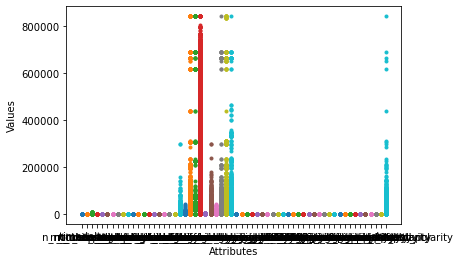

In [18]:
# Graphical frequency distribution of Numerical Attributes 
for a in range(len(num_data)):
    plt.plot(len(data[num_data[a]]) * [a], data[num_data[a]], ".")
    
f = plt.figure() 
f.set_figwidth() 
f.set_figheight(1)
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([a for a in range(len(num_data))], num_data)
plt.show()

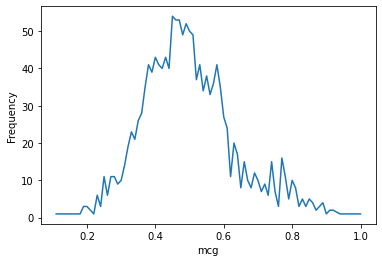

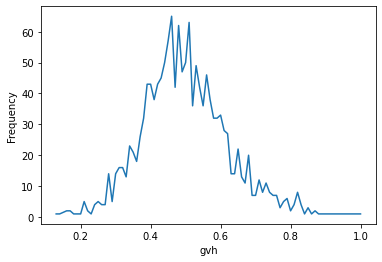

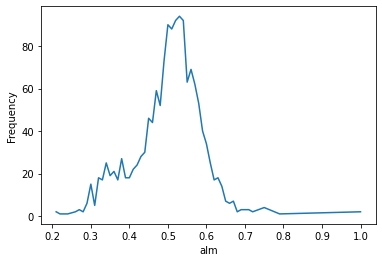

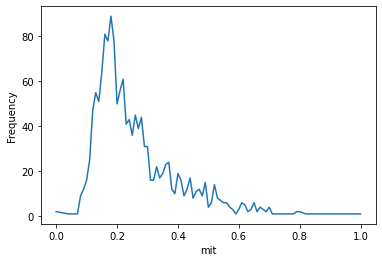

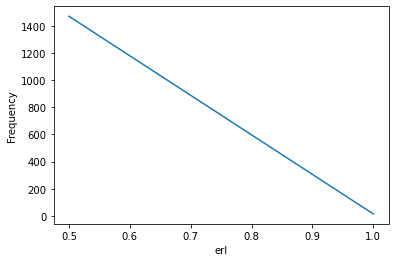

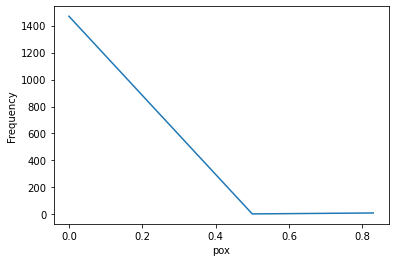

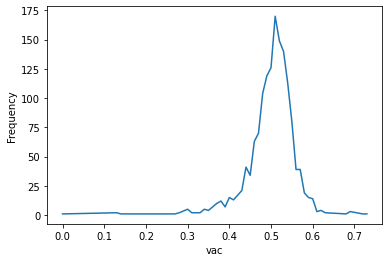

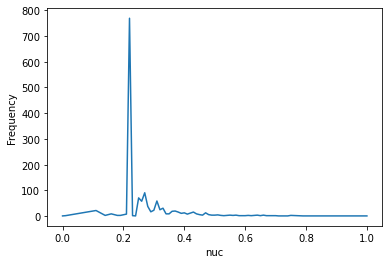

In [13]:
# Frequncy Distribution of each numerical attribute

for attribute in num_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
        
    x = sorted(data[attribute].unique())
    y = [freq_dist[val] for val in x]
    plt.plot(x, y)
    plt.ylabel("Frequency")
    plt.xlabel(attribute)
    plt.show()


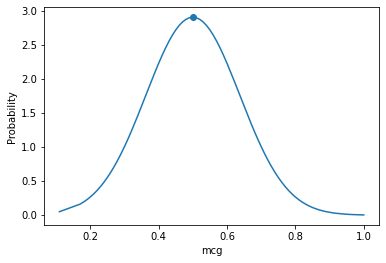

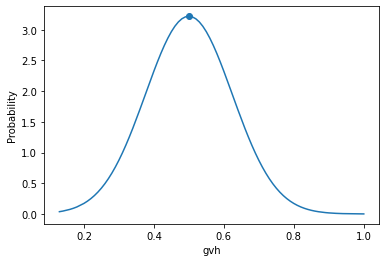

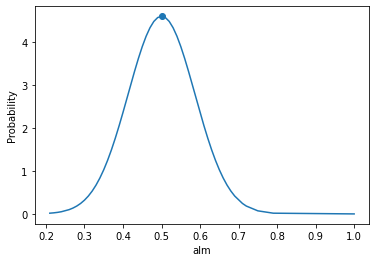

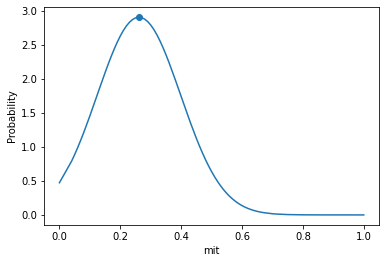

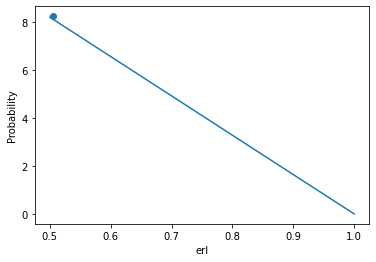

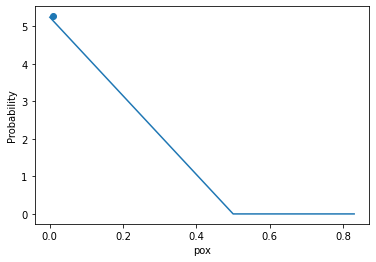

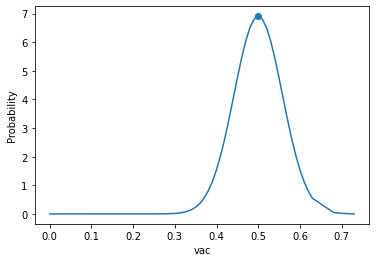

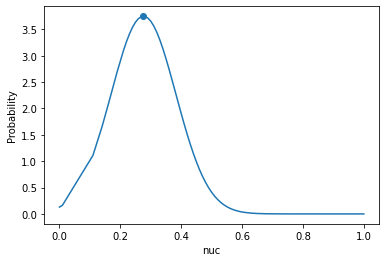

In [14]:
# Normal Distributions
for attribute in num_data:
    arr = sorted(data[attribute])
    mean = np.mean(arr)
    std = np.std(arr)
    pdf = stats.norm.pdf(arr, mean, std)
    plt.plot(arr, pdf)
    plt.scatter(mean, stats.norm.pdf(mean, mean, std))
    plt.ylabel("Probability")
    plt.xlabel(attribute)
    plt.show()

In [15]:
# Measures of Central Tendency

Central = pd.DataFrame(num_data, columns=["Attribute"])
Central["Arithmetic Mean"] = [data[column].mean() for column in num_data]
Central["Mode"] = [data.mode().iloc[0][column] for column in num_data]
Central["Lower Quartile"] = [data[column].quantile(0.25) for column in num_data]
Central["Median"] = [data[column].median() for column in num_data]
Central["Upper Quartile"] = [data[column].quantile(0.75) for column in num_data]

Central.head(len(num_data))

,Attribute,Arithmetic Mean,Mode,Lower Quartile,Median,Upper Quartile
0,mcg,0.500121,0.45,0.41,0.49,0.58
1,gvh,0.499933,0.46,0.42,0.49,0.57
2,alm,0.500034,0.53,0.46,0.51,0.55
3,mit,0.261186,0.18,0.17,0.22,0.32
4,erl,0.504717,0.50,0.50,0.50,0.50
5,pox,0.007500,0.00,0.00,0.00,0.00
6,vac,0.499885,0.51,0.48,0.51,0.53
7,nuc,0.276199,0.22,0.22,0.22,0.30


In [16]:
# Measures of Dispersion

Dispersion = pd.DataFrame(num_data, columns=["Attribute"])
Dispersion["Minimum"] = [data[column].min() for column in num_data]
Dispersion["Maximum"] = [data[column].max() for column in num_data]
Dispersion["Standard Deviation"] = [data[column].std() for column in num_data]
Dispersion["Variance"] = [data[column].std() ** 2 for column in num_data]

Dispersion.head(len(num_data))

,Attribute,Minimum,Maximum,Standard Deviation,Variance
0,mcg,0.11,1.00,0.137299,0.018851
1,gvh,0.13,1.00,0.123924,0.015357
2,alm,0.21,1.00,0.086670,0.007512
3,mit,0.00,1.00,0.137098,0.018796
4,erl,0.50,1.00,0.048351,0.002338
5,pox,0.00,0.83,0.075683,0.005728
6,vac,0.00,0.73,0.057797,0.003340
7,nuc,0.00,1.00,0.106491,0.011340
